# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
#Ejercicio 1
#INCISO A: Tengan en cuenta si hay valores duplicados y eliminénlos.
import pandas as pd
path_file_mica = '/Users/micavollert/Downloads/TP2/Base Airbnb NY.csv'
#path_file_sofi = '/Users/sofiadillon/Desktop/Ciencia de datos tutoriales/TP2/Base Airbnb NY.csv'

# Cargar la base de datos (reemplaza 'archivo.csv' con el nombre de tu archivo)
df = pd.read_csv(path_file_mica)
df
# Eliminar duplicados
df1 = df.drop_duplicates() #compara todas las columnas de cada fila. Si dos o más filas son idénticas en todas sus columnas, solo conservará una.


In [3]:
#Ejercicio 1
#INCISO B: Eliminen las columnas que no tienen información de interés.
df1.drop(["host_id", "id", "last_review", "host_name", "name"], axis=1) #no guarda

#nuevo df sin las columnas eliminadas
df2 = df1.drop(["host_id", "id", "last_review", "host_name", "name"], axis=1)
display(df2)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,6,2


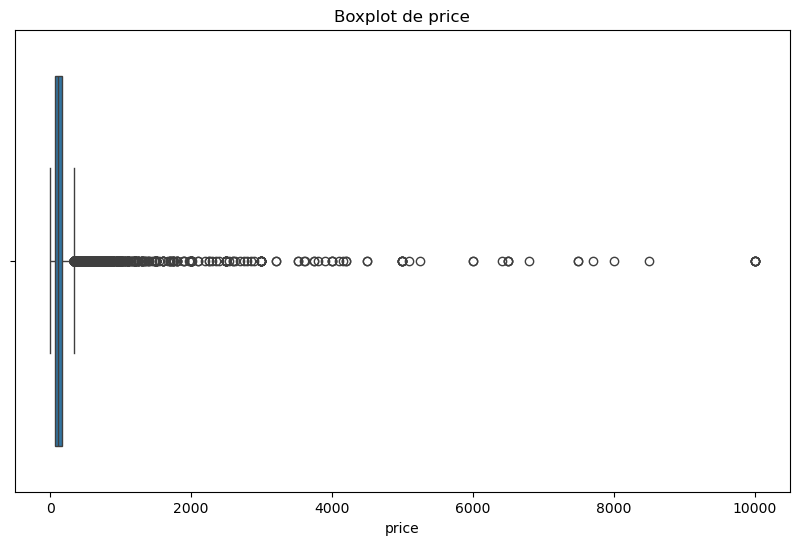

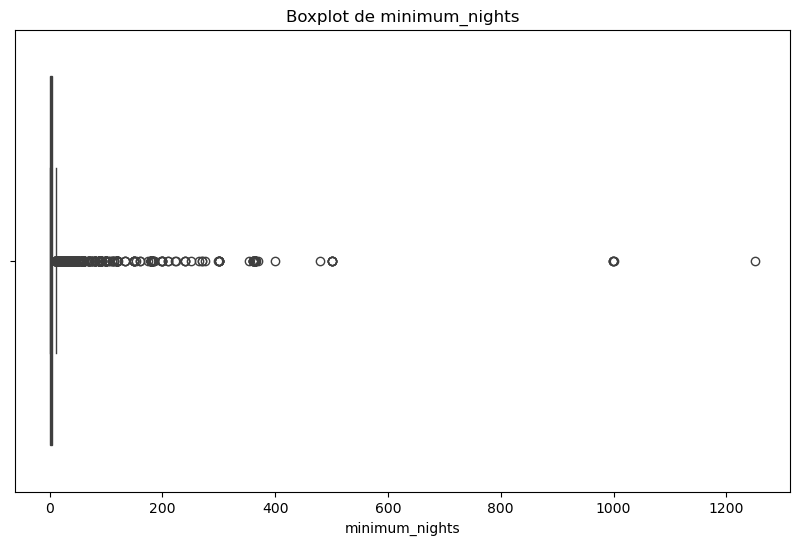

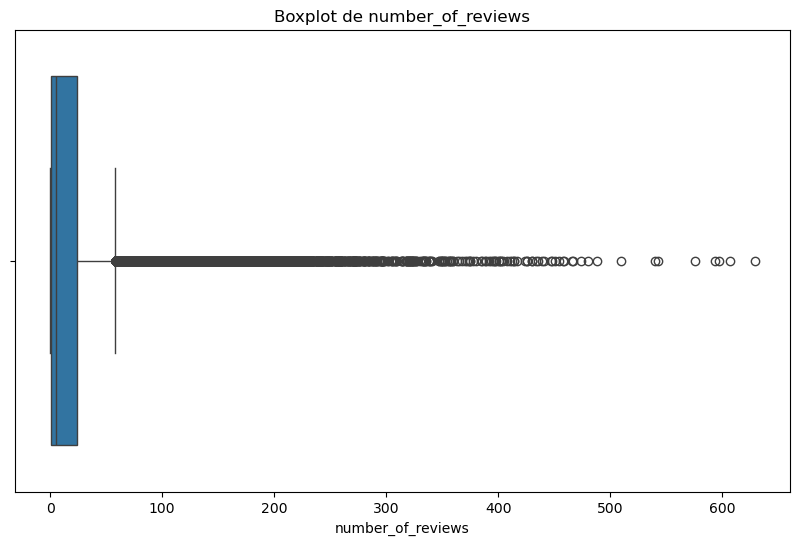

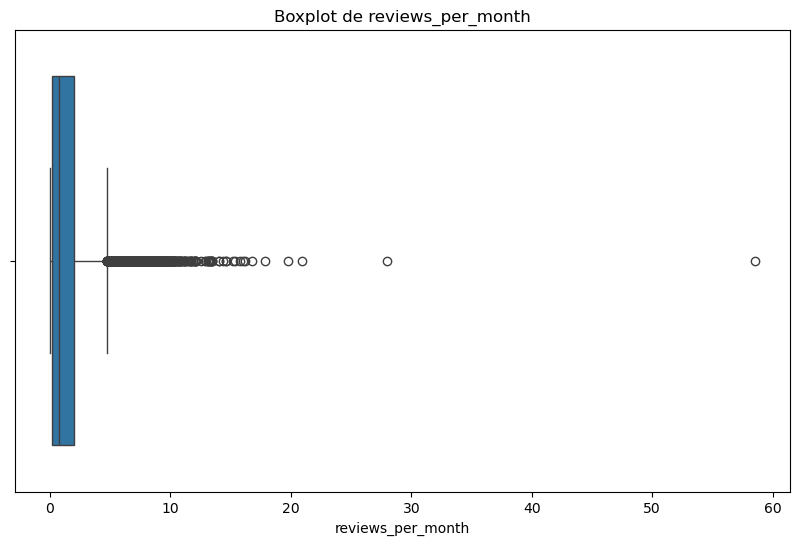

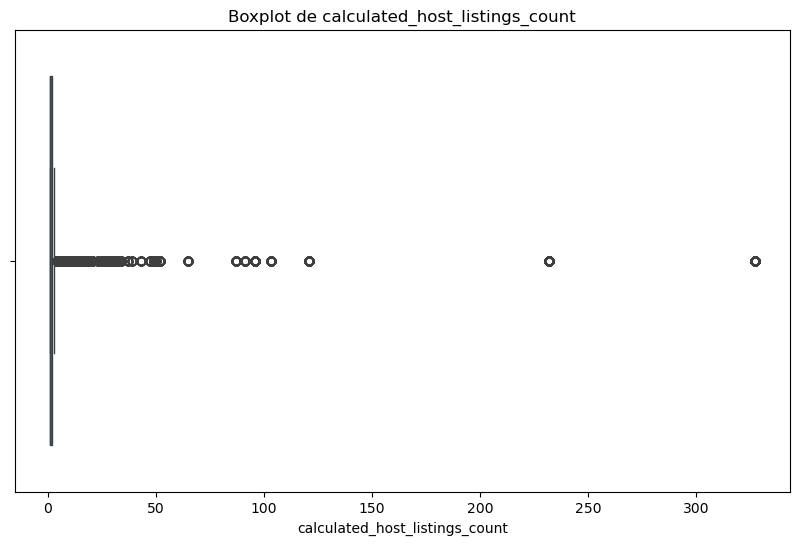

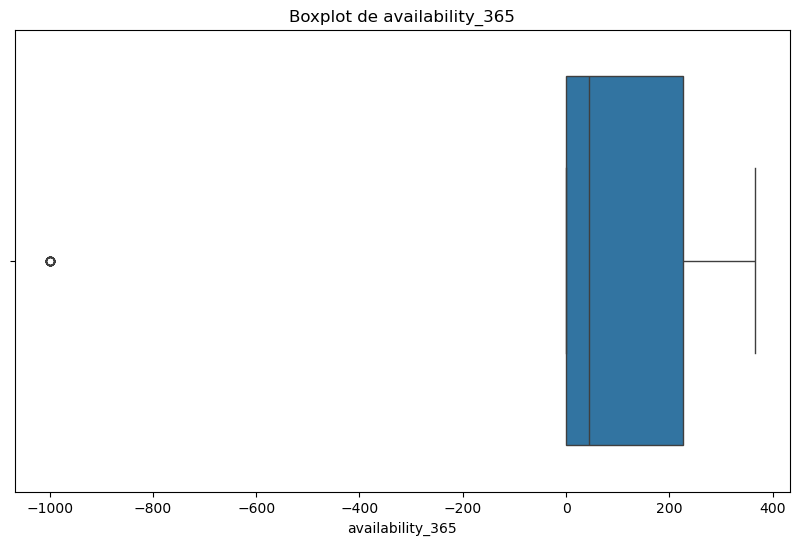

In [5]:
#Ejercicio 1
#INCISO C: Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas numéricas para graficar
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Visualizar outliers antes de limpiar
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


In [7]:
# Eliminar filas donde el precio es 0
df2 = df2[df2['price'] > 0]

# Verificar si se eliminaron correctamente
print(f"Filas después de eliminar precios de 0: {len(df2)}")


# Elegir las columnas a analizar
columna_interes = ['price']  # Especifica las columnas que deseas analizar

for columna in columna_interes:
    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df2[columna].quantile(0.25)
    Q3 = df2[columna].quantile(0.75)
    IQR = Q3 - Q1 #Esto permite establecer un rango en el que la mayoría de los datos debería encontrarse. 

    # Determinar límites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = df2[(df2[columna] < limite_inferior) | (df2[columna] > limite_superior)]
  
 #Mostrar los *outliers* para revisión manual
    print(f"Outliers en {columna}:")
    print(outliers[['price', 'room_type', 'neighbourhood_group']])

    #Ahora puedes analizar el DataFrame `outliers` y decidir si eliminarlos o no
    
    # Eliminar los outliers del DataFrame original
    df2_sin_outliers = df2[(df2[columna] >= limite_inferior) & (df2[columna] <= limite_superior)]

# Mostrar el DataFrame sin outliers
print("DataFrame sin outliers:")
print(df2_sin_outliers)

Filas después de eliminar precios de 0: 48869
Outliers en price:
       price        room_type neighbourhood_group
61     375.0  Entire home/apt           Manhattan
85     800.0  Entire home/apt            Brooklyn
103    500.0  Entire home/apt           Manhattan
114    350.0  Entire home/apt           Manhattan
121    400.0  Entire home/apt            Brooklyn
...      ...              ...                 ...
48758  350.0  Entire home/apt              Queens
48833  475.0  Entire home/apt           Manhattan
48839  800.0     Private room            Brooklyn
48842  350.0  Entire home/apt           Manhattan
48856  345.0  Entire home/apt            Brooklyn

[2972 rows x 3 columns]
DataFrame sin outliers:
      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3     

In [9]:
#VALORES NaN
#para evitar tener valores NaN en la base de datos, reemplazamos cada valor NaN por la mediana

#variale price
precio_mediana = df2_sin_outliers['price'].median()
df2_sin_outliers['price'] = df2_sin_outliers['price'].fillna(precio_mediana)

#variable reviews_per_month
precio_mediana = df2_sin_outliers['reviews_per_month'].median()
df2_sin_outliers['reviews_per_month'] = df2_sin_outliers['reviews_per_month'].fillna(precio_mediana)

display(df2_sin_outliers)

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_82956/1595046027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sin_outliers['price'] = df2_sin_outliers['price'].fillna(precio_mediana)
/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_82956/1595046027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sin_outliers['reviews_per_month'] = df2_sin_outliers['reviews_per_month'].fillna(precio_mediana)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.71,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.71,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.71,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.71,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.71,6,2


In [11]:
#Ejercicio 1
#INCISO D: Transformen las variables ‘neighbourhood_group’ y ‘room_type’ a variables numericas.
#Transformamos las variables‘neighbourhood_group’ y ‘room_type’ a variables numéricas
df2_sin_outliers['neighbourhood_group_numeric'] = df2_sin_outliers['neighbourhood_group'].astype('category').cat.codes
df2_sin_outliers['room_type_numeric'] = df2_sin_outliers['room_type'].astype('category').cat.codes

#Borramos las columnas categoricas, dejamos solo las numericas
df3 = df2_sin_outliers.drop(columns=['neighbourhood_group', 'room_type'])
df3

#Referencia:
#neighbourhood_group_numeric: 0 = Bronx // 1 = Brooklyn // 2 = Manhattan // 3 = Queens // 4 = Staten Island  
#room_type_numeric: 0 = Entire home/apt // 1 = Private Room // 2 = Shared room

/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_82956/3622487377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sin_outliers['neighbourhood_group_numeric'] = df2_sin_outliers['neighbourhood_group'].astype('category').cat.codes
/var/folders/c2/gtbjsyt14vqbtkzmxnc_htwr0000gn/T/ipykernel_82956/3622487377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_sin_outliers['room_type_numeric'] = df2_sin_outliers['room_type'].astype('category').cat.codes


,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,room_type_numeric
0,Kensington,40.64749,-73.97237,149.0,1,9,0.21,6,365,1,1
1,Midtown,40.75362,-73.98377,225.0,1,45,0.38,2,355,2,0
2,Harlem,40.80902,-73.94190,150.0,3,0,0.71,1,365,2,1
3,Clinton Hill,40.68514,-73.95976,89.0,1,270,4.64,1,194,1,0
4,East Harlem,40.79851,-73.94399,80.0,10,9,0.10,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Bedford-Stuyvesant,40.67853,-73.94995,70.0,2,0,0.71,2,9,1,1
48891,Bushwick,40.70184,-73.93317,40.0,4,0,0.71,2,36,1,1
48892,Harlem,40.81475,-73.94867,115.0,10,0,0.71,1,27,2,0
48893,Hell's Kitchen,40.75751,-73.99112,55.0,1,0,0.71,6,2,2,2


In [13]:
#Ejercicio 1
#INCISO E: Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group

#contamos la cantidad de oferentes que hay en Brooklyn y Manhattan
cantidad_oferentes = df3.groupby('neighbourhood_group_numeric').size().reset_index(name='offer_group')

#agregamos la cantidad de oferentes como nueva columna
df_limpio = df3.merge(cantidad_oferentes, on='neighbourhood_group_numeric')
df_limpio

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,room_type_numeric,offer_group
0,Kensington,40.64749,-73.97237,149.0,1,9,0.21,6,365,1,1,19399
1,Midtown,40.75362,-73.98377,225.0,1,45,0.38,2,355,2,0,19501
2,Harlem,40.80902,-73.94190,150.0,3,0,0.71,1,365,2,1,19501
3,Clinton Hill,40.68514,-73.95976,89.0,1,270,4.64,1,194,1,0,19399
4,East Harlem,40.79851,-73.94399,80.0,10,9,0.10,1,0,2,0,19501
...,...,...,...,...,...,...,...,...,...,...,...,...
45892,Bedford-Stuyvesant,40.67853,-73.94995,70.0,2,0,0.71,2,9,1,1,19399
45893,Bushwick,40.70184,-73.93317,40.0,4,0,0.71,2,36,1,1,19399
45894,Harlem,40.81475,-73.94867,115.0,10,0,0.71,1,27,2,0,19501
45895,Hell's Kitchen,40.75751,-73.99112,55.0,1,0,0.71,6,2,2,2,19501


In [15]:
display(df_limpio) #version final de la base de datos limpia

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,room_type_numeric,offer_group
0,Kensington,40.64749,-73.97237,149.0,1,9,0.21,6,365,1,1,19399
1,Midtown,40.75362,-73.98377,225.0,1,45,0.38,2,355,2,0,19501
2,Harlem,40.80902,-73.94190,150.0,3,0,0.71,1,365,2,1,19501
3,Clinton Hill,40.68514,-73.95976,89.0,1,270,4.64,1,194,1,0,19399
4,East Harlem,40.79851,-73.94399,80.0,10,9,0.10,1,0,2,0,19501
...,...,...,...,...,...,...,...,...,...,...,...,...
45892,Bedford-Stuyvesant,40.67853,-73.94995,70.0,2,0,0.71,2,9,1,1,19399
45893,Bushwick,40.70184,-73.93317,40.0,4,0,0.71,2,36,1,1,19399
45894,Harlem,40.81475,-73.94867,115.0,10,0,0.71,1,27,2,0,19501
45895,Hell's Kitchen,40.75751,-73.99112,55.0,1,0,0.71,6,2,2,2,19501


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [17]:
#Ejercicio 2

#"variables" contiene todas las variables que queremos usar para hacer las correlaciones
variables = ["neighbourhood_group_numeric", "latitude", "longitude", "room_type_numeric","price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
#creamos un nuevo df que contenga las variables de interes
df_variables = df_limpio[variables]
#realizamos las correlaciones
correlaciones = df_variables.corr()
display(correlaciones)

,neighbourhood_group_numeric,latitude,longitude,room_type_numeric,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group_numeric,1.000000,0.275395,0.113705,-0.010432,0.073581,0.015878,0.007699,0.062196,0.071841,0.076972
latitude,0.275395,1.000000,0.091188,0.011019,0.068711,0.025921,-0.012570,-0.014498,0.021375,-0.017092
longitude,0.113705,0.091188,1.000000,0.169266,-0.306946,-0.064273,0.053792,0.140960,-0.107701,0.094300
room_type_numeric,-0.010432,0.011019,0.169266,1.000000,-0.607284,-0.074392,-0.005271,0.031283,-0.103181,0.040918
price,0.073581,0.068711,-0.306946,-0.607284,1.000000,0.031512,-0.027639,-0.039688,0.174240,0.066813
minimum_nights,0.015878,0.025921,-0.064273,-0.074392,0.031512,1.000000,-0.082859,-0.113880,0.133857,0.145270
number_of_reviews,0.007699,-0.012570,0.053792,-0.005271,-0.027639,-0.082859,1.000000,0.573957,-0.070520,0.181488
reviews_per_month,0.062196,-0.014498,0.140960,0.031283,-0.039688,-0.113880,0.573957,1.000000,-0.032137,0.170139
calculated_host_listings_count,0.071841,0.021375,-0.107701,-0.103181,0.174240,0.133857,-0.070520,-0.032137,1.000000,0.223763
availability_365,0.076972,-0.017092,0.094300,0.040918,0.066813,0.145270,0.181488,0.170139,0.223763,1.000000


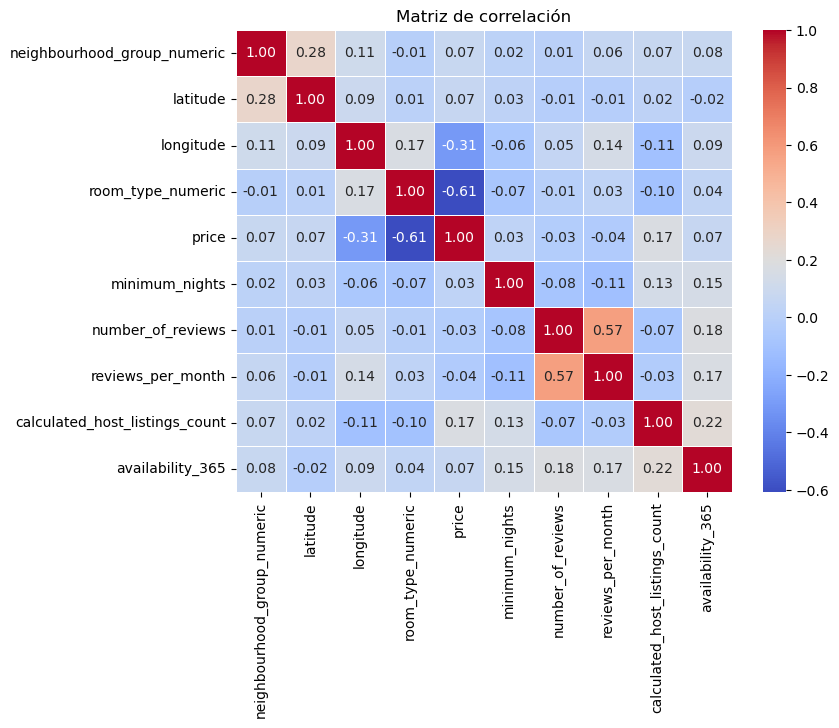

In [19]:
#grafico de la matriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

#aca creamos el heatmap usando seaborn
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Matriz de correlación')
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [23]:
#Ejercio 3

#proporción de oferentes por "neighbourhood_group"
neighbourhood_group_proporcion = df2_sin_outliers['neighbourhood_group'].value_counts(normalize=True)
display(neighbourhood_group_proporcion)
#referencia para interpretar los resultado: 0=Bronx, 1=Brooklyn, 2=Manhattan, 3=Queens, 4=Staten Island. 

#proporción de oferentes por "room_type"
room_type_proporcion = df2_sin_outliers['room_type'].value_counts(normalize=True)
display(room_type_proporcion)
#referencia para interpretar los resultado: 0=Entire home/apt, 1=Private room, 2=Shared room

#usamos la base de datos df2_sin_outliers, ya que esta tiene la columna de neighbourhood_group y room_type con los nombres, lo cual nos resultaba mas facil para interpretar

neighbourhood_group
Manhattan        0.424886
Brooklyn         0.422664
Queens           0.121250
Bronx            0.023248
Staten Island    0.007953
Name: proportion, dtype: float64

room_type
Entire home/apt    0.496372
Private room       0.478877
Shared room        0.024751
Name: proportion, dtype: float64

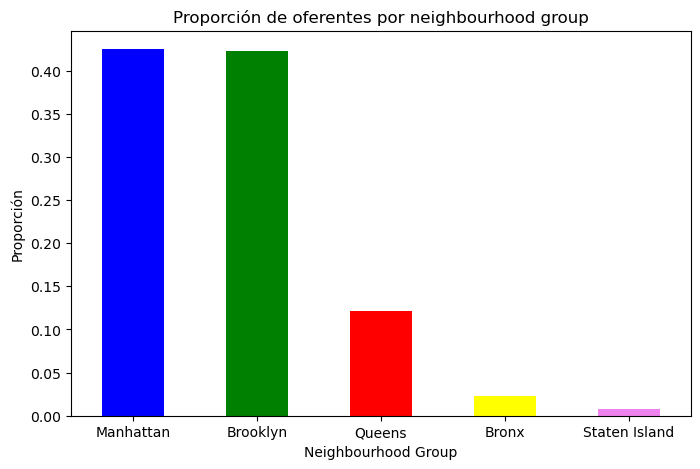

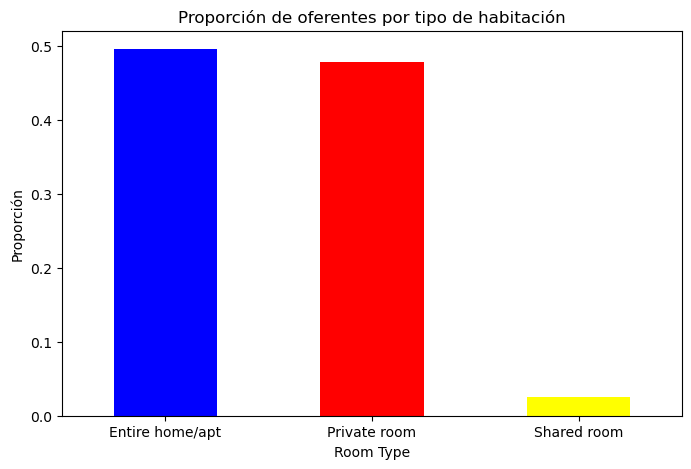

In [25]:
import matplotlib.pyplot as plt

#gráfico de proporción de oferentes por "neighbourhood_group"
plt.figure(figsize=(8, 5))
neighbourhood_group_proporcion.plot(kind='bar', color=['blue', 'green', 'red', 'yellow', 'violet'])
plt.title('Proporción de oferentes por neighbourhood group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

#gráfico de proporción de oferentes por "room_type"
plt.figure(figsize=(8, 5))
room_type_proporcion.plot(kind='bar', color=['blue', 'red', 'yellow'])
plt.title('Proporción de oferentes por tipo de habitación')
plt.xlabel('Room Type')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

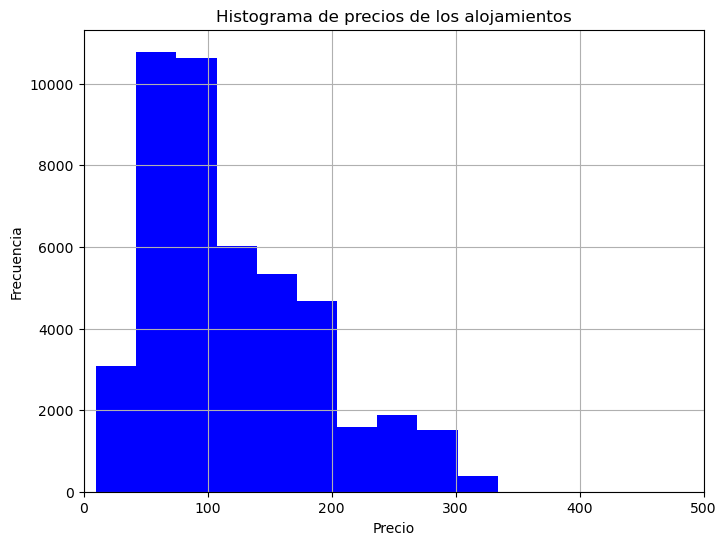

In [27]:
#INCISO A: histograma de los precios de los alojamientos

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_limpio['price'].hist(bins=10, color='blue')
plt.title('Histograma de precios de los alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 500) #el eje x va del 0 al 500
plt.show()


In [29]:
#INCISO B: ¿cuál es el precio mínimo, máximo y promedio?

# Calcular min, max y promedio de los precios
precio_min = df_limpio['price'].min()
precio_max = df_limpio['price'].max()
precio_promedio = df_limpio['price'].mean()

print('El precio mínimo es', precio_min)
print('El precio máximo es', precio_max)
print('El precio promedio es', precio_promedio)


El precio mínimo es 10.0
El precio máximo es 334.0
El precio promedio es 120.00056648582697


In [31]:
#INCISO C: ¿cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?

#calculamos la media de precio por "neighbourhood group" y por tipo de habitación
precio_promedio_neighbourhood = df2_sin_outliers.groupby('neighbourhood_group')['price'].mean()
precio_promedio_roomtype = df2_sin_outliers.groupby('room_type')['price'].mean()

#print('La media de precio por neighbourhood group:', precio_promedio_neighbourhood)
#print('La media de precio por tipo de habitacion:', precio_promedio_roomtype)

print("Promedio de Precio por Neighbourhood Group:")
for grupo, precio in precio_promedio_neighbourhood.items():
    print(f"- {grupo}: ${precio:.2f}")
    #referencia para interpretar los resultado: 0=Bronx, 1=Brooklyn, 2=Manhattan, 3=Queens, 4=Staten Island. 

print("\nPromedio de Precio por Tipo de Habitación:")
for tipo, precio in precio_promedio_roomtype.items():
    print(f"- {tipo}: ${precio:.2f}") #con este codigo logramos que la visualización de los resultados se vea mejor
    #referencia para interpretar los resultado: 0=Entire home/apt, 1=Private room, 2=Shared room

#usamos la base de datos df2_sin_outliers, ya que esta tiene la columna de neighbourhood_group y room_type con los nombres, lo cual nos resultaba mas facil para interpretar

Promedio de Precio por Neighbourhood Group:
- Bronx: $77.39
- Brooklyn: $105.75
- Manhattan: $145.95
- Queens: $88.92
- Staten Island: $89.24

Promedio de Precio por Tipo de Habitación:
- Entire home/apt: $162.54
- Private room: $79.04
- Shared room: $59.40


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

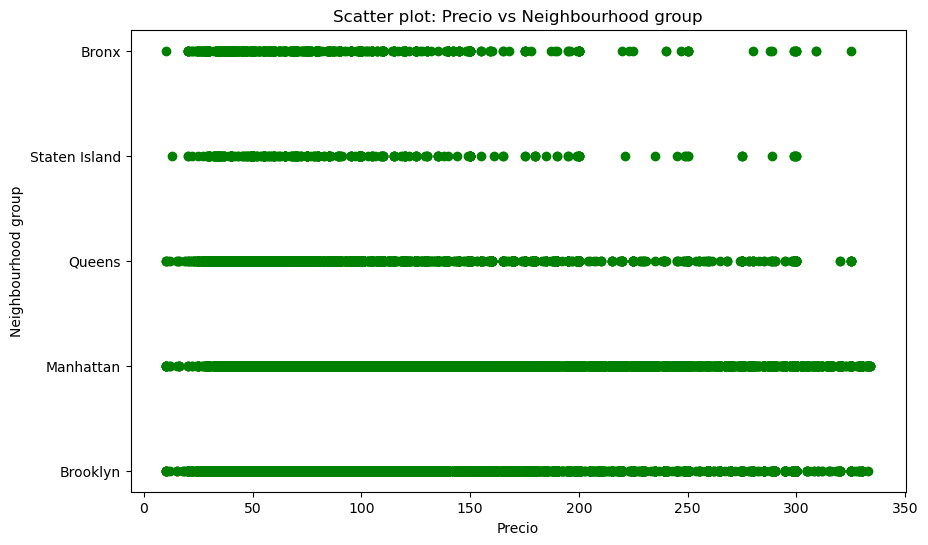

In [33]:
#Ejercicio 5
#Relacion entre el precio y la cantidad de reseñas

#scatter plot de precio vs. numero de reseñas
plt.figure(figsize=(10,6))
plt.scatter(df2_sin_outliers['price'], df2_sin_outliers['neighbourhood_group'], color='green')
plt.title('Scatter plot: Precio vs Neighbourhood group')
plt.xlabel('Precio')
plt.ylabel('Neighbourhood group')
plt.show()

#Interpretacion del grafico
#Distribución de los precios por vecindario:
#Vecindario Brooklyn (Y = 0): Parece haber algunas propiedades con precios más bajos, y algunas pocas con precios más altos (más dispersión en el eje X).
#Vecindarios Manhattan, Queens y Staten Island (Y = 1, 2, 3): Los precios están más concentrados y relativamente alineados, sin demasiada variación. No hay muchos puntos con precios extremadamente altos en estos vecindarios.
#Vecindario Bronx (Y = 4): Este vecindario tiene una mayor cantidad de puntos dispersos en la parte más alta del rango de precios, lo que sugiere que este vecindario tiende a tener propiedades más caras o una mayor variabilidad en los precios.

#Variabilidad de precios:
#En general, parece que algunos vecindarios (especialmente el 4) tienen una gama más amplia de precios, mientras que otros tienen una gama más restringida.
#La mayoría de los puntos tienden a agruparse en un rango de precios moderados (menores de 100).

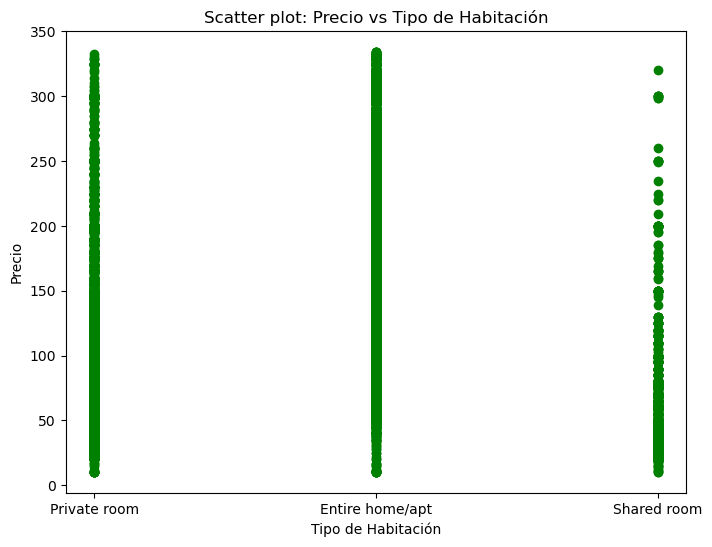

In [74]:
#relacion entre el precio y tipo de habitación
plt.figure(figsize=(8,6))
plt.scatter(df2_sin_outliers['room_type'], df2_sin_outliers['price'], color='green') #cambiar la base de datos
plt.title('Scatter plot: Precio vs Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

#Tipo de habitacion Entire home/apt:La dispersión sugiere que este tipo de alojamiento es el más variable en cuanto a precios, posiblemente porque "entire home/apt" ofrece muchas variaciones en el tamaño, ubicación y calidad.
#Tipo de habitación Private rooms:Este grupo corresponde a habitaciones privadas. Los precios aquí están también bastante concentrados, pero hay menos dispersión que en el caso de las propiedades completas. La mayoría de los precios parecen ser menores a 100, con pocas excepciones.
#Tipo de habitación Shared room:Este grupo parece representar habitaciones compartidas. Los precios en este grupo son considerablemente más bajos en comparación con los otros tipos de alojamiento, y se observan pocas propiedades con precios mayores a 100.

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [35]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
!pip install scikit-learn
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [39]:
#Ejercicio 6

#Para realizar el PCA primero vamos a quedarnos solo con las variables numericas. 
#convenrtimos la variable neighbourhood a numerica 
df_limpio['neighbourhood_numeric'] = df_limpio['neighbourhood'].astype('category').cat.codes
df_limpio_sin_neighbourhood = df_limpio.drop(columns=['neighbourhood'])
df_limpio_sin_neighbourhood

#Ahora calculamos la media y desviacion estandar de cada columna
# Calcular la media de todas las columnas
print(df_limpio_sin_neighbourhood.mean())
# Calcular la desviación estándar de todas las columnas
print(df_limpio_sin_neighbourhood.std())

#Vemos que la media no es cero y, más críticamente, la sd no es uno.
#Vamos a usar el scaler de `sklearn` (la función que importamos `StandardScaler`) para llevarlas a media 0 y sd 1.
# Escalamos las variables
# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
df_limpio_sin_neighbourhood_transformed = pd.DataFrame(scaler.fit_transform(df_limpio_sin_neighbourhood), columns=df_limpio_sin_neighbourhood.columns)
print(df_limpio_sin_neighbourhood_transformed.mean()) # luego de la estandarización la media es cero
print(df_limpio_sin_neighbourhood_transformed.std()) # la desviación estandar es uno
display(df_limpio_sin_neighbourhood_transformed.head()) #muestra solo las primeras 5 filas porque le pusimos el comando 'head'

latitude                             40.728493
longitude                           -73.950739
price                               120.000566
minimum_nights                        6.938362
number_of_reviews                    23.943155
reviews_per_month                     1.247015
calculated_host_listings_count        6.634290
availability_365                    108.996688
neighbourhood_group_numeric           1.667996
room_type_numeric                     0.528379
offer_group                       17187.422729
neighbourhood_numeric               105.604353
dtype: float64
latitude                             0.055331
longitude                            0.046473
price                               68.134872
minimum_nights                      19.862043
number_of_reviews                   45.322316
reviews_per_month                    1.540079
calculated_host_listings_count      30.980618
availability_365                   131.800928
neighbourhood_group_numeric          0.747329
room_ty

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,room_type_numeric,offer_group,neighbourhood_numeric
0,-1.464009,-0.465455,0.425623,-0.298984,-0.329712,-0.673360,-0.020474,1.942369,-0.893854,0.862935,0.410595,0.020342
1,0.454122,-0.710763,1.541070,-0.298984,0.464607,-0.562974,-0.149588,1.866497,0.444260,-0.966785,0.429532,0.297280
2,1.455389,0.190207,0.440300,-0.198288,-0.528292,-0.348697,-0.181867,1.942369,0.444260,0.862935,0.429532,-0.183717
3,-0.783546,-0.194109,-0.454993,-0.298984,5.429103,2.203148,-0.181867,0.644944,-0.893854,-0.966785,0.410595,-0.941652
4,1.265437,0.145234,-0.587086,0.154147,-0.329712,-0.744785,-0.181867,-0.826989,0.444260,-0.966785,0.429532,-0.650138


In [41]:
print(df_limpio_sin_neighbourhood_transformed.isnull().sum())
df_limpio_sin_neighbourhood_transformed['reviews_per_month'] = df_limpio_sin_neighbourhood_transformed['reviews_per_month'].fillna(0)


latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_numeric       0
room_type_numeric                 0
offer_group                       0
neighbourhood_numeric             0
dtype: int64


In [43]:
#Aplicamos PCA. Estamos buscando maximizar la varianza de los predictores con la restricción de normalización.

#Primero vamos a ajustar el modelo.
# Inicializamos el PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)

# Ajustamos PCA a los datos estandarizados (sin la columna 'neighbourhood')
df_pca = pca.fit_transform(df_limpio_sin_neighbourhood_transformed)

#Luego podemos ver la varianza explicada por cada componente (columna), esto está en `explained_variance_ratio_` del objeto en el que hayamos ajustados 
# los componentes principales. En nuestro caso `pca`.
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)

#Porcentaje de varianza explicada: El valor que obtienes en el explained_variance_ratio_ te indica qué porcentaje de la información (varianza) de los datos originales está 
#capturada por los dos componentes. En general, si el porcentaje es alto (idealmente >70%), significa que las dos primeras dimensiones capturan la mayor parte de la variabilidad en los datos.
#Interpretación: como el porcentaje es bajo, se pude indicar que se necesitan más componentes principales para capturar la estructura de los datos.

Varianza explicada: [0.18305258 0.14425519]


In [45]:
#Vamos a ver los _loadings_. 
#Recordemos que estos son vectores que nos dicen cómo se proyecta cada valor de las coordenadas originales en cada una de las componentes principales.

# Loadings vectors
#Loadings: Son los pesos o coeficientes que indican cuánto influye cada variable original en la creación de un componente principal. 
#Cuanto mayor sea el valor absoluto de un loading, mayor será la contribución de esa variable a ese componente.

loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
# Imprimir los loadings de todos los componentes principales
print("Loadings (todos los componentes):\n", pca.components_)

# Imprimir los loadings del CP1 (Componente Principal 1)
print("Loadings del CP1 (Componente Principal 1):\n", pca.components_[0])

# Imprimir los loadings del CP2 (Componente Principal 2) para todas las variables
print("Loadings del CP2 (Componente Principal 2):\n", pca.components_[1])

#Valores grandes (en valor absoluto): Indican que la variable original tiene un impacto significativo en la dirección del componente principal.
#Valores pequeños: Indican que la variable tiene poca contribución a ese componente principal.

Loadings (todos los componentes):
 [[ 0.08773413  0.48098406 -0.40886663 -0.1154712   0.21851386  0.28143265
  -0.14536099  0.12799933  0.22821308  0.35464822 -0.47911103 -0.09263528]
 [ 0.33099751  0.02651647  0.43014072  0.13321342  0.1599703   0.18253977
   0.2834791   0.28744846  0.45122902 -0.36820468 -0.2477135   0.25402382]]
Loadings del CP1 (Componente Principal 1):
 [ 0.08773413  0.48098406 -0.40886663 -0.1154712   0.21851386  0.28143265
 -0.14536099  0.12799933  0.22821308  0.35464822 -0.47911103 -0.09263528]
Loadings del CP2 (Componente Principal 2):
 [ 0.33099751  0.02651647  0.43014072  0.13321342  0.1599703   0.18253977
  0.2834791   0.28744846  0.45122902 -0.36820468 -0.2477135   0.25402382]


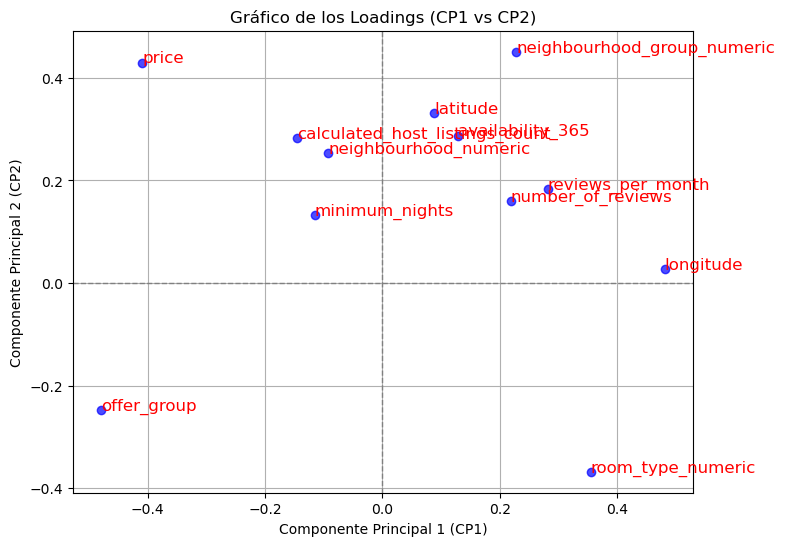

In [47]:
#Graficamos los loadings
import matplotlib.pyplot as plt

# Extraer los loadings de los dos primeros componentes principales
loadings = pca.components_.T  # Transponemos para que cada fila sea una variable y cada columna sea un CP

# Crear una gráfica de dispersión para visualizar los loadings
plt.figure(figsize=(8, 6))

# Graficar los loadings del CP1 (eje X) y CP2 (eje Y)
plt.scatter(loadings[:, 0], loadings[:, 1], color='b', alpha=0.7)

# Añadir etiquetas para cada variable
variables = df_limpio_sin_neighbourhood_transformed.columns
for i, variable in enumerate(variables):
    plt.text(loadings[i, 0], loadings[i, 1], variable, color='r', fontsize=12)

# Etiquetas de los ejes
plt.xlabel('Componente Principal 1 (CP1)')
plt.ylabel('Componente Principal 2 (CP2)')
plt.title('Gráfico de los Loadings (CP1 vs CP2)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

#Interpretacion del grafico
#Variables más cercanas al eje X (CP1):
#Las variables que tienen un valor más grande en el eje X tienen una mayor contribución al CP1.
#offer_group tiene un valor alto en CP1, lo que significa que esta variable contribuye significativamente a la primera dimensión del PCA. 
#Por otro lado, variables como latitude, neighbourhood_group_numeric y price también tienen una fuerte influencia en CP1.

#Variables más cercanas al eje Y (CP2):
#Las variables más alejadas del eje Y contribuyen más al CP2.
#En este caso, neighbourhood_group_numeric, latitude, y neighbourhood_numeric tienen mayor influencia en el CP2, ya que están más alejadas en el eje Y.

#Las variables cercanas entre sí en el gráfico están altamente correlacionadas, ya que sus loadings son similares para ambos componentes principales. Por ejemplo:
#latitude y neighbourhood_group_numeric están bastante cerca, lo que sugiere que estas variables tienen un comportamiento similar en los datos.

#offer_group está bastante alejada de las demás, lo que indica que esta variable tiene un comportamiento muy diferente comparado con las otras variables.

#Las variables más cercanas al origen (0,0) tienen una contribución menor tanto a CP1 como a CP2.
#Por ejemplo, availability_365 y room_type_numeric están cerca del centro del gráfico, lo que indica que no tienen un peso significativo en ninguno de los dos componentes principales.


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [49]:
#antes de hacer la regresion convenrtimos la variable neighbourhood a numerica 
df_limpio['neighbourhood_numeric'] = df_limpio['neighbourhood'].astype('category').cat.codes
df_regresion = df_limpio.drop(columns=['neighbourhood'])

#le sacamos los valores NaN y los reemplazamos por la mediana
neighbourhood_mediana = df_regresion['neighbourhood_numeric'].median()
df_regresion['neighbourhood_numeric'] = df_regresion['neighbourhood_numeric'].fillna(neighbourhood_mediana)
display(df_regresion)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_numeric,room_type_numeric,offer_group,neighbourhood_numeric
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,1,1,19399,107
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,2,0,19501,126
2,40.80902,-73.94190,150.0,3,0,0.71,1,365,2,1,19501,93
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,1,0,19399,41
4,40.79851,-73.94399,80.0,10,9,0.10,1,0,2,0,19501,61
...,...,...,...,...,...,...,...,...,...,...,...,...
45892,40.67853,-73.94995,70.0,2,0,0.71,2,9,1,1,19399,13
45893,40.70184,-73.93317,40.0,4,0,0.71,2,36,1,1,19399,28
45894,40.81475,-73.94867,115.0,10,0,0.71,1,27,2,0,19501,93
45895,40.75751,-73.99112,55.0,1,0,0.71,6,2,2,2,19501,94


In [51]:
#Ejercicio 8 

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

y = df_regresion['price']  #variable dependiente, lo que se quiere predecir
X = df_regresion.drop(columns=['price'])  #las variables independientes

#agregar una columna de unos a X
X = pd.DataFrame(np.c_[np.ones(X.shape[0]), X], columns=['Intercept'] + list(X.columns))

#aca dividimos el conjunto de datos en entrenamiento y prueba (la base de entrenamiento debe comprender el 70% de los datos)
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Mostrar las formas de los conjuntos de datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {Y_train.shape}")
print(f"Tamaño de y_test: {Y_test.shape}")

#este codigo nos devuelve la cantidad de observaciones que hay en la base de entrenamiento y en la base de test
#el 12 de la variable X indica la cantidad de variables regresoras o predictoras (todas menos el precio). en la variable y no hay un valor asignado ya que es la variable depedinetnte (no hay predictoras)

Tamaño de X_train: (32127, 12)
Tamaño de X_test: (13770, 12)
Tamaño de y_train: (32127,)
Tamaño de y_test: (13770,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

# Imputamos los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#creamos el modelo de regresión lineal
#entrenamos el modelo con los datos imputados de "train" (base de entrenamiento)
modelo = LinearRegression().fit(X_train_imputed, Y_train)

# Predicciones sobre el conjunto de prueba
prediccion = modelo.predict(X_test_imputed)

#Evaluamos el modelo, calculando el error cuadrático medio y el R²
mse = mean_squared_error(Y_test, prediccion)
r2 = r2_score(Y_test, prediccion)

# Evaluamos los coeficientes (betas)
coeficientes = pd.DataFrame(modelo.coef_, index=X_train.columns, columns=['Coeficiente'])

# Conjunto de resultados
print("Errores de Predicción")
print("---------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")

print("\nCoeficientes del Modelo:")
display(coeficientes)


Errores de Predicción
---------------------
Error Cuadrático Medio (MSE): 2503.83
R²: 0.46

Coeficientes del Modelo:


,Coeficiente
Intercept,0.000000
latitude,79.004905
longitude,-232.703262
minimum_nights,-0.190180
number_of_reviews,-0.063516
reviews_per_month,0.580883
calculated_host_listings_count,0.142648
availability_365,0.062158
neighbourhood_group_numeric,9.970738
room_type_numeric,-70.405232
